Password(description='Password:')

IntSlider(value=1, description='Version:', max=40, min=1)

IntSlider(value=1, description='Box Size:', max=20, min=1)

IntSlider(value=4, description='Border:', max=10, min=1)

Text(value='', description='Link:')

Dropdown(description='Fill Color:', options=('black', 'white', 'red', 'green', 'blue', 'yellow', 'cyan', 'mage…

Dropdown(description='Back Color:', index=1, options=('black', 'white', 'red', 'green', 'blue', 'yellow', 'cya…

Text(value='', description='Image Name:')

Button(description='Generate QR Code', style=ButtonStyle())

Output()

Access Granted!
Most welcome to Program!


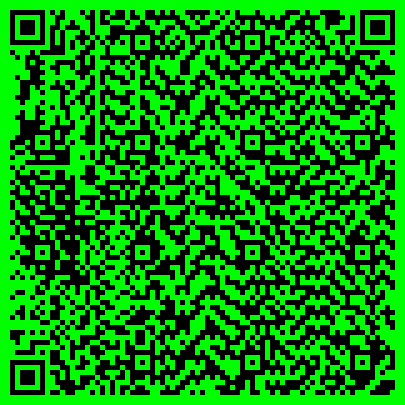

In [5]:
import ipywidgets as widgets
from IPython.display import display, Image
import qrcode
from PIL import Image as PILImage
from io import BytesIO

def generate_qr_code(button):
    # Get inputs from widgets
    password = 'Free Palestine'
    user_password = password_widget.value

    if user_password == password:
        try:
            print('Access Granted!\nMost welcome to Program!')
            version_ = version_widget.value
            bsize = bsize_widget.value
            border_ = border_widget.value
            data = data_widget.value

            if 1 <= version_ <= 40:
                if 1 <= bsize <= 20:
                    if border_ > 0:
                        if data:
                            qr = qrcode.QRCode(version=version_, box_size=bsize, border=border_)
                            qr.add_data(data)
                            qr.make(fit=True)

                            fill_colors = {
                                "black": "#000000", "white": "#FFFFFF", "red": "#FF0000", "green": "#00FF00",
                                "blue": "#0000FF", "yellow": "#FFFF00", "cyan": "#00FFFF", "magenta": "#FF00FF",
                                "gray": "#808080", "darkgray": "#A9A9A9", "lightgray": "#D3D3D3", "brown": "#A52A2A",
                                "orange": "#FFA500", "purple": "#800080", "pink": "#FFC0CB", "lime": "#00FF00",
                                "teal": "#008080", "navy": "#000080", "maroon": "#800000", "olive": "#808000",
                                "beige": "#F5F5DC", "silver": "#C0C0C0", "gold": "#FFD700"
                            }

                            fill_ = fill_color_widget.value
                            backcolor = back_color_widget.value

                            if fill_ in fill_colors and backcolor in fill_colors:
                                img = qr.make_image(fill=fill_colors[fill_], back_color=fill_colors[backcolor])

                                # Save image to a BytesIO object
                                img_buffer = BytesIO()
                                img.save(img_buffer, format='PNG')
                                img_buffer.seek(0)

                                imgname = img_name_widget.value
                                img_buffer.seek(0)
                                # Save the image to a file
                                with open(f'{imgname}.png', 'wb') as f:
                                    f.write(img_buffer.read())

                                # Display image
                                output_widget.clear_output()
                                display(Image(filename=f'{imgname}.png'))

                                output_widget.value = f'QR Code saved as {imgname}.png'
                            else:
                                output_widget.value = 'Please enter valid fill and background colors from the given list!'
                        else:
                            output_widget.value = 'Please enter a valid link!'
                    else:
                        output_widget.value = 'Enter a correct border (positive integer) please!'
                else:
                    output_widget.value = 'Enter a correct box size (1-20) please!'
            else:
                output_widget.value = 'Enter a correct version (1-40) please!'
        except Exception as e:
            output_widget.value = f'Error: {str(e)}'
    else:
        output_widget.value = 'Incorrect Password! Access Denied!'

# Create widgets
password_widget = widgets.Password(description='Password:')
version_widget = widgets.IntSlider(value=1, min=1, max=40, step=1, description='Version:')
bsize_widget = widgets.IntSlider(value=1, min=1, max=20, step=1, description='Box Size:')
border_widget = widgets.IntSlider(value=4, min=1, max=10, step=1, description='Border:')
data_widget = widgets.Text(description='Link:')
fill_color_widget = widgets.Dropdown(
    options=["black", "white", "red", "green", "blue", "yellow", "cyan", "magenta", "gray", "darkgray", "lightgray", "brown", "orange", "purple", "pink", "lime", "teal", "navy", "maroon", "olive", "beige", "silver", "gold"],
    value="black",
    description='Fill Color:'
)
back_color_widget = widgets.Dropdown(
    options=["black", "white", "red", "green", "blue", "yellow", "cyan", "magenta", "gray", "darkgray", "lightgray", "brown", "orange", "purple", "pink", "lime", "teal", "navy", "maroon", "olive", "beige", "silver", "gold"],
    value="white",
    description='Back Color:'
)
img_name_widget = widgets.Text(description='Image Name:')
output_widget = widgets.Output()

# Create button
button = widgets.Button(description="Generate QR Code")
button.on_click(generate_qr_code)

# Display widgets
display(password_widget, version_widget, bsize_widget, border_widget, data_widget, fill_color_widget, back_color_widget, img_name_widget, button, output_widget)
